<a href="https://colab.research.google.com/github/dineshkk15/hello-world/blob/main/Python_advance/07_Pandas_Merge_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Merge DataFrames

Load data.

In [ ]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Notes

* `merge()`: Combine DataFrames based on common columns or indices, similar to SQL joins (inner, outer, left, right).
* It merges rows from the DataFrame based on the specific keys.

## Examples

### Example 1

We need to combine two DataFrames:
- `df_jobs` has info similiar to our `df` DataFrame
- `df_companies` has company info

In [ ]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [ ]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [ ]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [ ]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [ ]:
df_india = df[df['job_country'] == 'India'].copy()
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')
df_india['job_posted_month_no'] = df_india['job_posted_date'].dt.month
df_india_pivot = df_india.pivot_table(index=['job_posted_month', 'job_posted_month_no'], columns='job_title_short', aggfunc='size')
df_india_pivot.sort_values(by='job_posted_month_no', inplace=True)

In [ ]:
df_india_pivot.reset_index(level='job_posted_month_no', drop=True, inplace=True)
df_india_pivot.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='job_posted_month')

In [ ]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [ ]:
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3.index

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

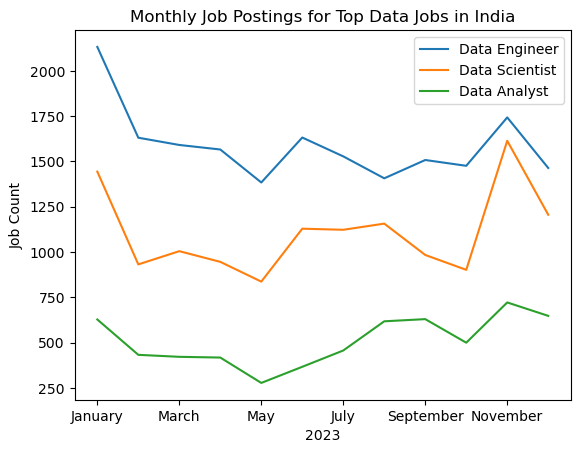

In [ ]:
df_india_pivot[top_3.index].plot(kind='line')
plt.legend()
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.title('Monthly Job Postings for Top Data Jobs in India')
plt.show()

In [ ]:
df_india_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_india_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [ ]:
df_india_merged =df_india_pivot.merge(df_india_software_pivot, on='job_posted_month')
df_india_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192,13619,9827,5108,4348
February,143,35,433,1631,932,42,94,313,165,157,11456,9116,7298,4284
March,116,37,422,1591,1005,34,96,351,194,180,11102,8178,5814,4159
April,170,32,418,1566,946,54,86,375,194,169,14037,9209,7232,4220
May,103,14,278,1384,837,31,59,329,134,98,12126,8864,6718,4980
June,146,26,367,1632,1129,41,66,427,238,125,12003,8065,5902,4781
July,142,25,457,1528,1123,54,75,359,204,155,11914,8061,6839,4344
August,189,25,618,1407,1157,47,126,343,235,148,11571,8191,7413,4104
September,155,34,630,1508,984,67,85,324,195,132,14016,8447,6139,4094


In [ ]:
top_5 =df_india_merged.sum().sort_values(ascending=False).head(5).index

top_5

Index(['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer',
       'UI/UX Designer', 'Data Engineer'],
      dtype='object')

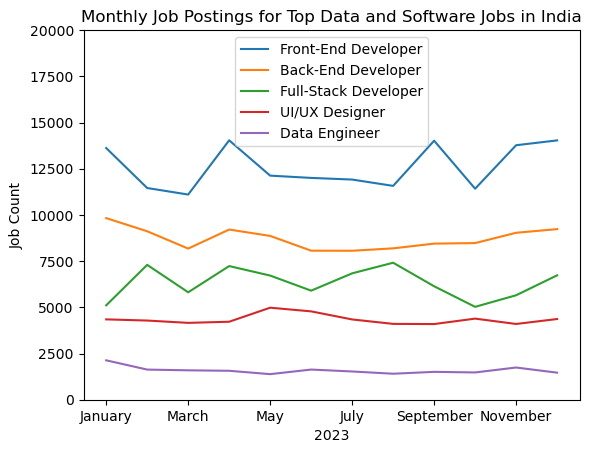

In [ ]:
df_india_merged[top_5].plot(kind='line')
plt.legend()
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.title('Monthly Job Postings for Top Data and Software Jobs in India')
plt.ylim(0, 20000)
plt.show()

In [ ]:
# Merge the two datasets on the 'job_id' column
df_job_company = df_jobs.merge(df_companies, on='company_name')

df_job_company

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


### Example 2

The data we have is only for data science job postings, but what if we wanted to combine insights with other job industries?

Recall the pivot we previously made:

In [ ]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot = df_US_pivot.sort_values('job_posted_month_no')
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,529,34,8541,2590,6940,62,1554,765,1553,120
February,444,21,6117,2999,5007,62,1258,856,1132,91
March,434,20,6215,3127,4729,57,1120,845,1136,111
April,570,39,6032,2805,4899,50,1022,777,987,114
May,287,21,5010,2958,4389,48,852,736,897,89
June,445,27,5683,2850,4672,43,1015,803,1050,97
July,587,45,5178,2537,4852,66,873,741,1104,150
August,896,37,6654,3263,6284,71,1183,877,1509,192
September,889,50,4651,3166,4627,116,793,776,1021,231


Let's make some fake data for this.

**NOTE: The code here is not important for you to understand**.

In [ ]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


Alternatively, we can just load the data:

In [ ]:
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


Well we can combine these using merge:

In [ ]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on='job_posted_month')
df_US_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,529,34,8541,2590,6940,62,1554,765,1553,120,13619,9827,5108,4348
February,444,21,6117,2999,5007,62,1258,856,1132,91,11456,9116,7298,4284
March,434,20,6215,3127,4729,57,1120,845,1136,111,11102,8178,5814,4159
April,570,39,6032,2805,4899,50,1022,777,987,114,14037,9209,7232,4220
May,287,21,5010,2958,4389,48,852,736,897,89,12126,8864,6718,4980
June,445,27,5683,2850,4672,43,1015,803,1050,97,12003,8065,5902,4781
July,587,45,5178,2537,4852,66,873,741,1104,150,11914,8061,6839,4344
August,896,37,6654,3263,6284,71,1183,877,1509,192,11571,8191,7413,4104
September,889,50,4651,3166,4627,116,793,776,1021,231,14016,8447,6139,4094


And now we can plot it!

In [ ]:
# find top 5 job titles (columns) in df_US_merged
top_5 = df_US_merged.sum().sort_values(ascending=False).head(5).index

top_5 = top_5.tolist()

top_5


['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

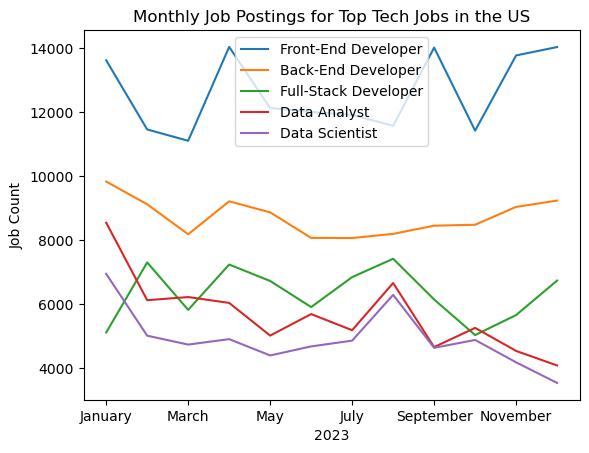

In [ ]:
df_US_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Top Tech Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

### Example 3

Now looking at our dataset. Let's create two DataFrames.
* The first one will get the count of Data Analyst jobs by month.
* The second one will (similarly) get the count of Senior Data Analyst jobs by month.

Finally, we will merge these two DataFrames to easily compare the demand for Data Analyst vs Senior Data Analyst jobs.

1. Create a new DataFrame that only gets Data Analyst jobs, creates a column for the month, and get the job postings by month.

In [ ]:
## Filter for Data Analysts
df_DA = df[(df['job_title_short'] == 'Data Analyst')].copy()

## Create a column for month
df_DA['month'] = df_DA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_DA_pivot

month
1     23686
2     16544
3     16312
4     15563
5     13438
6     15932
7     16095
8     18631
9     14966
10    16267
11    15163
12    13996
Name: job_title_short, dtype: int64

2. Create a new DataFrame that only gets Senior Data Analyst jobs, creates a column for the month, and get the job postings by month.

In [ ]:
## Filter for Senior Data Analysts
df_SDA = df[(df['job_title_short'] == 'Senior Data Analyst')].copy()

## Create a column for month
df_SDA['month'] = df_SDA['job_posted_date'].dt.month

## Pivot table to count job postings by month
df_SDA_pivot = df_SDA.pivot_table(index='month', aggfunc='count')['job_title_short']

## Print the pivot table
df_SDA_pivot

month
1     3702
2     2713
3     2458
4     2343
5     1916
6     2334
7     2377
8     2945
9     2216
10    2327
11    2134
12    1824
Name: job_title_short, dtype: int64

3. Finally, we'll merge the two pivot tables together.

In [ ]:
## Merge the two pivot tables
merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how='outer', left_index=True, right_index=True)
merged_DA_pivot.columns = ['DA_count', 'SDA_count']
merged_DA_pivot

,DA_count,SDA_count
month,,
1,23686,3702
2,16544,2713
3,16312,2458
4,15563,2343
5,13438,1916
6,15932,2334
7,16095,2377
8,18631,2945
9,14966,2216
